In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [5]:
df.shape

(1048575, 10)

In [24]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00
mean,26.97,1.71,158666.98,524159.89,874009.54,893808.90,123818.83,978160.05,1114197.97,0.00
std,15.62,1.35,264940.93,302624.50,2971750.56,3008271.33,123782.64,2296780.39,2416593.12,0.03
min,1.00,0.00,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,15.00,1.00,12149.07,262077.50,0.00,0.00,36299.00,0.00,0.00,0.00
50%,20.00,1.00,76343.33,524160.00,16002.00,0.00,72333.00,126377.21,218260.36,0.00
75%,39.00,3.00,213761.89,786239.50,136642.02,174599.99,187510.50,915923.47,1149807.51,0.00
max,95.00,4.00,10000000.00,1048316.00,38900000.00,38900000.00,449634.00,42100000.00,42200000.00,1.00


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = {}
for i in df.select_dtypes('object').columns:
    encoder[i] = LabelEncoder()
    df[i] = encoder[i].fit_transform(df[i])

In [11]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,125164,170136.0,160296.36,274917,0.0,0.0,0
1,1,3,1864.28,361319,21249.0,19384.72,286716,0.0,0.0,0
2,1,4,181.00,165236,181.0,0.00,73550,0.0,0.0,1
3,1,1,181.00,961662,181.0,0.00,65464,21182.0,0.0,1
4,1,3,11668.14,567915,41554.0,29885.86,138001,0.0,0.0,0


<Axes: >

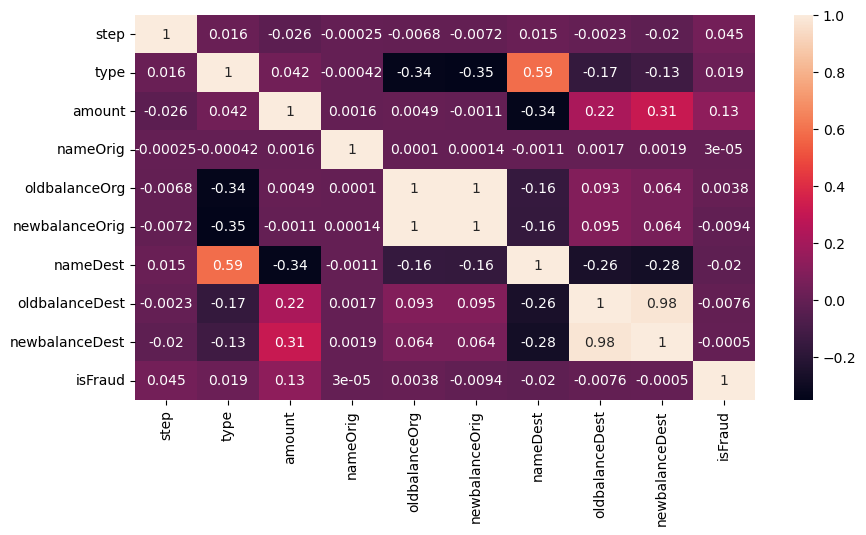

In [25]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [12]:
x = df.drop(columns=['isFraud'])
y = df['isFraud']

In [13]:
y.value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [17]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred = rf_classifier.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)

array([[314235,      5],
       [    72,    261]], dtype=int64)

In [21]:
accuracy_score(y_test, y_pred)

0.999755223747747

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

In [23]:
print(classification_report(y_test,y_pred))
print('ROC AUC Score')
print(roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314240
           1       0.98      0.78      0.87       333

    accuracy                           1.00    314573
   macro avg       0.99      0.89      0.94    314573
weighted avg       1.00      1.00      1.00    314573

ROC AUC Score
0.8918839361892442
